In [1]:
import dask_awkward as dak
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

full_load_path = f"./output/V2/*.parquet"
df_V2 = dak.from_parquet(full_load_path) 
full_load_path = f"./output/V1/*.parquet"
df_V1 = dak.from_parquet(full_load_path) 

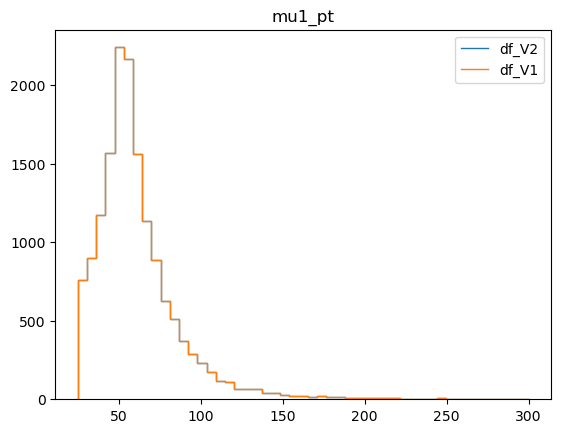

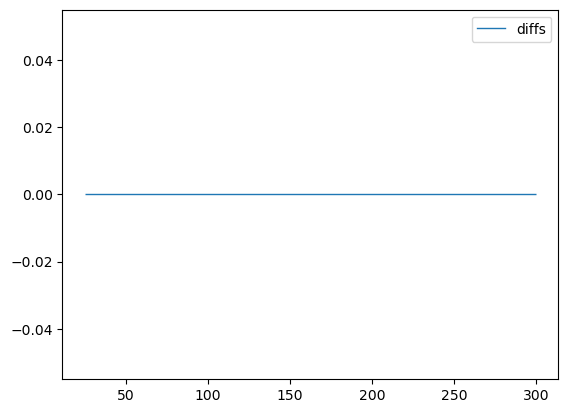

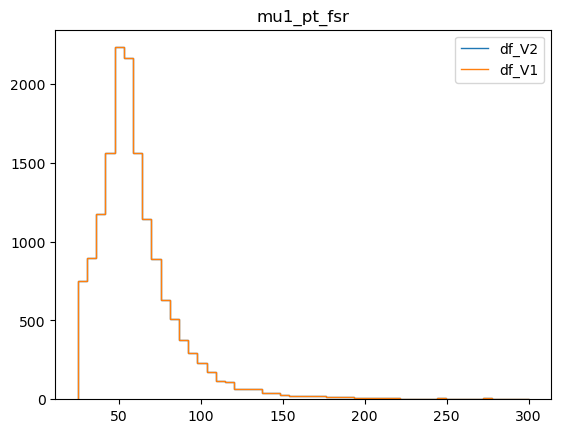

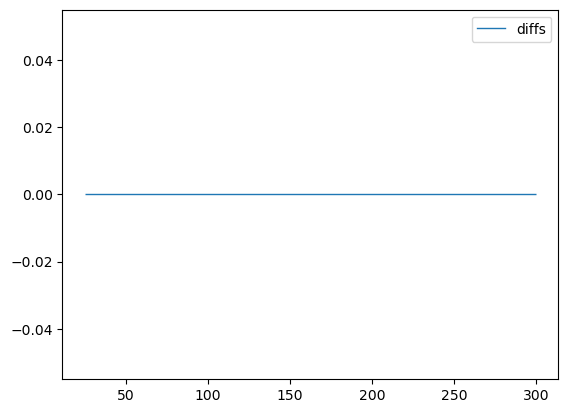

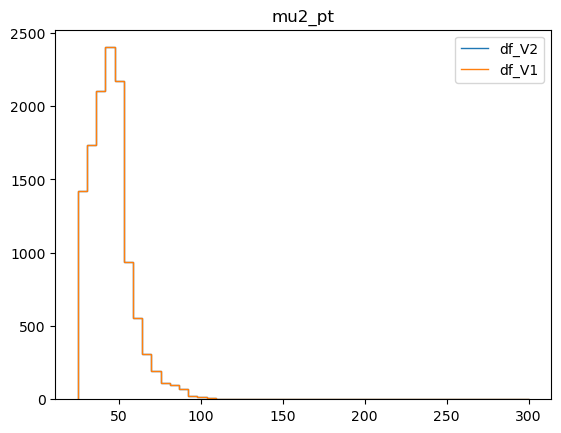

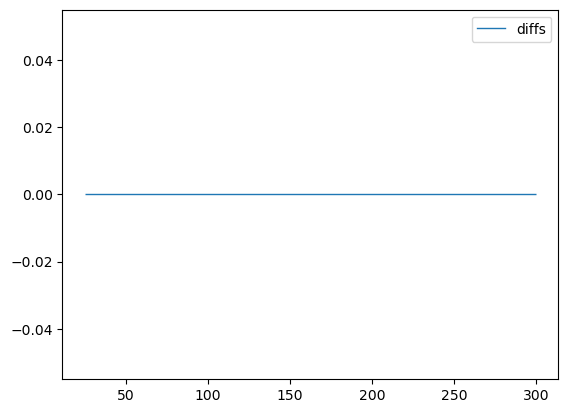

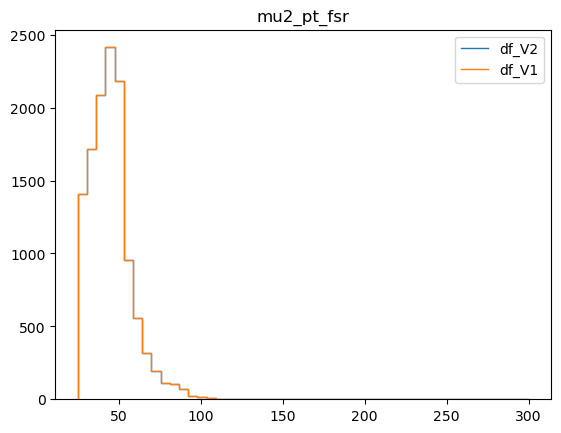

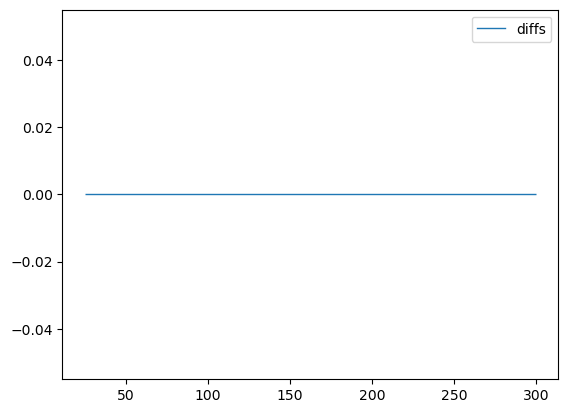

In [2]:
binning_map = {
    "pt" : [25, 300, 50],
    "fsr" : [25, 300, 50],
    "eta" : [-5, 5, 30],
    "phi" : [-3.1415, 3.1415, 101],
    "mass" : [0, 150, 100],
}
variables = [
    "mu1_pt",
    "mu1_pt_fsr",
    "mu2_pt",
    "mu2_pt_fsr",
]
for var in variables:
    kin = var.split("_")[-1]
    binning = np.linspace(*binning_map[kin])
    hist_V2, edges = np.histogram(df_V2[var].compute(), bins=binning )
    hist_V1, edges = np.histogram(df_V2[var].compute(), bins=binning )
    plt.stairs(hist_V2, edges, label = "df_V2")
    plt.stairs(hist_V1, edges, label = "df_V1")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_V2-hist_V1), edges, label = "diffs")
    plt.legend(loc="upper right")
    plt.show()

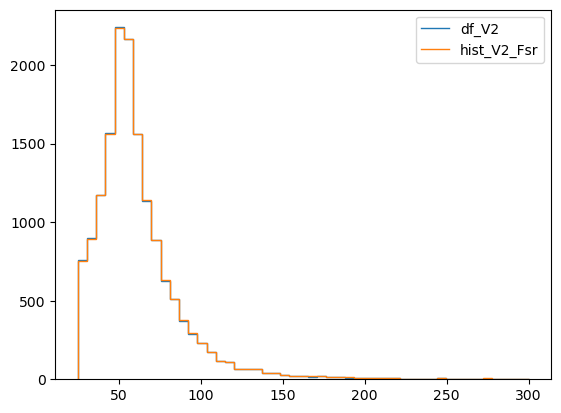

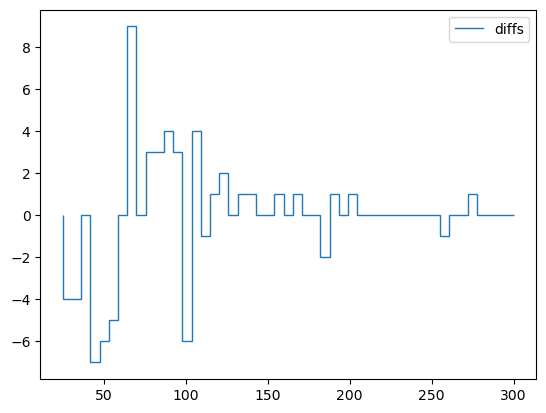

In [3]:
hist_V2, edges = np.histogram(df_V2["mu1_pt"].compute(), bins=binning )
hist_V2_Fsr, edges = np.histogram(df_V2["mu1_pt_fsr"].compute(), bins=binning )

plt.stairs(hist_V2, edges, label = "df_V2")
plt.stairs(hist_V2_Fsr, edges, label = "hist_V2_Fsr")
plt.legend(loc="upper right")
plt.show()
plt.stairs((hist_V2_Fsr-hist_V2), edges, label = "diffs")
plt.legend(loc="upper right")
plt.show()

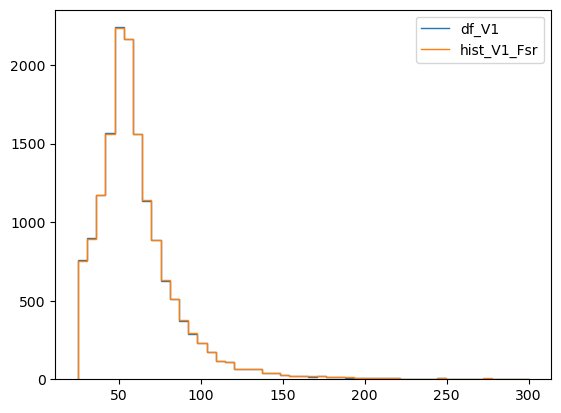

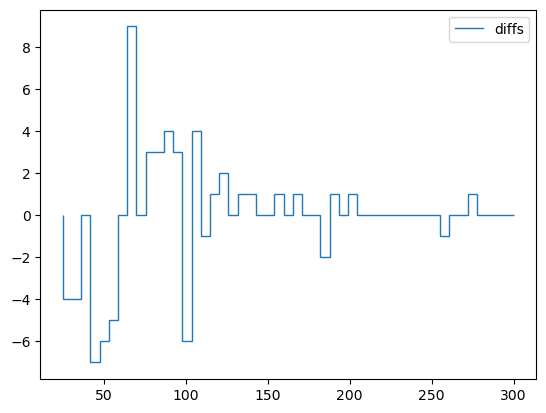

In [4]:
hist_V1, edges = np.histogram(df_V1["mu1_pt"].compute(), bins=binning )
hist_V1_Fsr, edges = np.histogram(df_V1["mu1_pt_fsr"].compute(), bins=binning )

plt.stairs(hist_V1, edges, label = "df_V1")
plt.stairs(hist_V1_Fsr, edges, label = "hist_V1_Fsr")
plt.legend(loc="upper right")
plt.show()
plt.stairs((hist_V1_Fsr-hist_V1), edges, label = "diffs")
plt.legend(loc="upper right")
plt.show()